<a id="mc5"></a>
# 사후퀴즈 hh501팀 (강동현, 김무현)

<a id="mc5"></a>
# 문제1 3-asset 주가 경로 생성

In [29]:
# stock_process_with_correllation2
import numpy as np
import matplotlib.pyplot as plt

def stock_process_with_correllation2(x_vol=0.2662, y_vol=0.2105, z_vol=0.2111, r=0.0165, N=80, T=1, S1_0=100, S2_0=100, S3_0=100, rho_xy=0.279, rho_xz=0.2895, rho_yz=0.5256):
    plt.close()
    S1 = np.zeros((N + 1, 1))
    S2 = np.zeros((N + 1, 1))
    S3 = np.zeros((N + 1, 1))
    S1[0] = S1_0; S2[0] = S2_0; S3[0] = S3_0
    dt = T / N ; t = np.linspace(0, T, N + 1)
    correlation = np.array([[1, rho_xy, rho_xz], [rho_xy, 1, rho_yz], [rho_xz, rho_yz, 1]])
    cholesky = np.linalg.cholesky(correlation)
    z0 = np.random.normal(0, 1, size=[N,3])
    np.random.seed(56)
    z0 = np.transpose(z0)
    z = np.matmul(cholesky, z0)
    Worst_performer = np.zeros((N + 1, 1))
    for i in range(N):
        S1[i + 1] = S1[i] * np.exp((r - 0.5 * x_vol ** 2) * dt + x_vol * z[0, i] * np.sqrt(dt))
        S2[i + 1] = S2[i] * np.exp((r - 0.5 * y_vol ** 2) * dt + y_vol * z[1, i] * np.sqrt(dt))
        S3[i + 1] = S3[i] * np.exp((r - 0.5 * z_vol ** 2) * dt + z_vol * z[2, i] * np.sqrt(dt))
        Worst_performer[i] = min(S1[i, 0], S2[i, 0], S3[i, 0])
        Worst_performer[-1] = min(S1[-1, 0], S2[-1, 0], S3[-1, 0])
    plt.plot(t, S1[:], 'r-', label='asset1', linewidth=1, markersize=3.5)
    plt.plot(t, S2[:], 'g-', label='asset2', linewidth=1, markersize=3.5)
    plt.plot(t, S3[:], 'b-', label='asset3', linewidth=1, markersize=3.5)
    plt.plot(t, Worst_performer[:], 'k+-', label='min(S1, S2, S3)', linewidth=1, markersize=3.5)
    plt.legend()
    plt.xlim(0, 1.0)
    plt.ylim(70, 130)
    plt.xlabel('Time')
    plt.ylabel('Stock Process')
    plt.legend(prop={'size':12})
    plt.show()

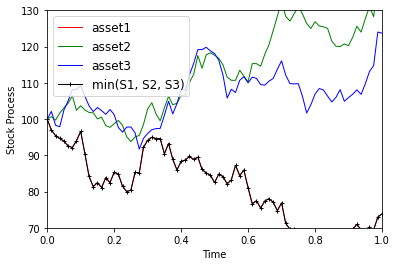

In [32]:
stock_process_with_correllation2(x_vol=0.2662, y_vol=0.2105, z_vol=0.2111, r=0.0165, N=80, T=1, S1_0=100, S2_0=100, S3_0=100, rho_xy=0.279, rho_xz=0.2895, rho_yz=0.5256)

<a id="mc6"></a>
# 문제 2 2-asset ELS

|조기 행사 만기|조기 행사가|쿠폰 이자율|상환금액|
|:------------:|:--------:|:---------:|:-----:|
|2022년 5월 27일|최초기준가격의 95%|4.8%|액면금액 x 104.8%|
|2022년 11월 27일|최초기준가격의 95%|9.6%|액면금액 x 109.6%|
|2023년 5월 27일|최초기준가격의 95%|4.8%|액면금액 x 114.4%|
|2023년 11월 27일|최초기준가격의 90%|9.6%|액면금액 x 119.2%|
|2024년 5월 27일|최초기준가격의 90%|4.8%|액면금액 x 124.0%|
|2024년 11월 27일|최초기준가격의 85%|9.6%|액면금액 x 128.8%|

In [35]:
# ELS_MC_2D
import numpy as np
from datetime import date
n = 10000; r = 0.0165
x_vol = 0.2662; y_vol = 0.2105; z_vol = 0.2111
n0 = date.toordinal(date(2022, 5, 27))
n1 = date.toordinal(date(2022, 11, 27))
n2 = date.toordinal(date(2023, 5, 27))
n3 = date.toordinal(date(2023, 11, 27))
n4 = date.toordinal(date(2024, 5, 27))
n5 = date.toordinal(date(2024, 11, 27))
n6 = date.toordinal(date(2025, 5, 27))
check_day = np.array([n1-n0, n2-n0, n3-n0, n3-n0, n5-n0, n6-n0])
rho_xy=0.279; rho_xz=0.2895; rho_yz=0.5256; corr = np.array([[1, rho_xy, rho_xz], [rho_xy, 1, rho_yz], [rho_xz, rho_yz, 1]])
coupon_rate = ([0.048, 0.096, 0.144, 0.192, 0.240, 0.288])
oneyear = 365; tot_date = n6 - n0; dt = 1 / oneyear
k = np.linalg.cholesky(corr)
S1 = np.zeros((tot_date + 1, 1))
S2 = np.zeros((tot_date + 1, 1))
S3 = np.zeros((tot_date + 1, 1))
S1[0] = 100; S2[0] = 100; S3[0] = 100
ratio_S1 = S1[0]; ratio_S2 = S2[0]; ratio_S3 = S3[0]
strike_price = ([0.95, 0.95, 0.95, 0.90, 0.90, 0.85])
repay_n = len(strike_price)
payment = np.zeros([repay_n, 1])
payoff = np.zeros([repay_n, 1])
tot_payoff = np.zeros([repay_n, 1])
discount_payoff = np.zeros([repay_n, 1])
face_value = 10**4; dummy=0.06; kib = 0.50
for j in range(repay_n):
    payment[j] = face_value * (1 + coupon_rate[j])
for i in range(n):
    w0 = np.random.normal(0, 1, size=[tot_date, 3])
    w0 = np.transpose(w0)
    w = np.matmul(k, w0)
    for j in range(tot_date):
        S1[j + 1] = S1[j] * np.exp((r - 0.5 * x_vol ** 2) * dt + x_vol * np.sqrt(dt) * w[0,j])
        S2[j + 1] = S2[j] * np.exp((r - 0.5 * y_vol ** 2) * dt + y_vol * np.sqrt(dt) * w[1,j])
        S3[j + 1] = S3[j] * np.exp((r - 0.5 * z_vol ** 2) * dt + z_vol * np.sqrt(dt) * w[2,j])
        R1 = S1 / ratio_S1; R2 = S2 / ratio_S2; R3 = S3 / ratio_S3
        WP = np.minimum(R1, R2, R3)
        WP_checkday = WP[check_day]
        payoff = np.zeros([repay_n, 1]); repay_event = 0
        for j in range(repay_n):
            if WP_checkday[j] >= strike_price[j]:
                    payoff[j] = payment[j]
                    repay_event = 1
                    break
        if repay_event == 0:
            if min(WP) > kib:
                payoff[-1] = face_value * (1 + dummy)
            else:
                payoff[-1] = face_value * WP[-1]
    tot_payoff = tot_payoff + payoff
mean_payoff = tot_payoff / n
for j in range(repay_n):
    discount_payoff[j] = mean_payoff[j] * np.exp(-r * check_day[j] / oneyear)

price = np.sum(discount_payoff)
print(price)

9748.930482777041
